In [ ]:
# Core libraries
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Save and load models
import joblib
import pickle

from scipy.stats import boxcox
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import precision_recall_curve

# Load the CSV file
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

#Step 1 Save a version of the df with no changes
df_transformed = df = df

In [2]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Data Cleaning:

Due to the data being gathered in-house and by a multiple choice survey with no open ended questions, the data cleaning process is streamlined. However there are still a few items we could check for:

Data types which are are int64 and object:

Duplications and null values which are both null:

I also stripped the extra spaces.

Data Exploration

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Checking for Outliers 
Although some models are highly impacted by outliers, it's important to know if there is any skew in the data because a lot of statistical techniques, assume that the errors are normally distributed.

To check for outliers you can use Z - score and IQR (Interquartile Range) Method among a range of other methods. I used Box plots to visualise the spread of results.

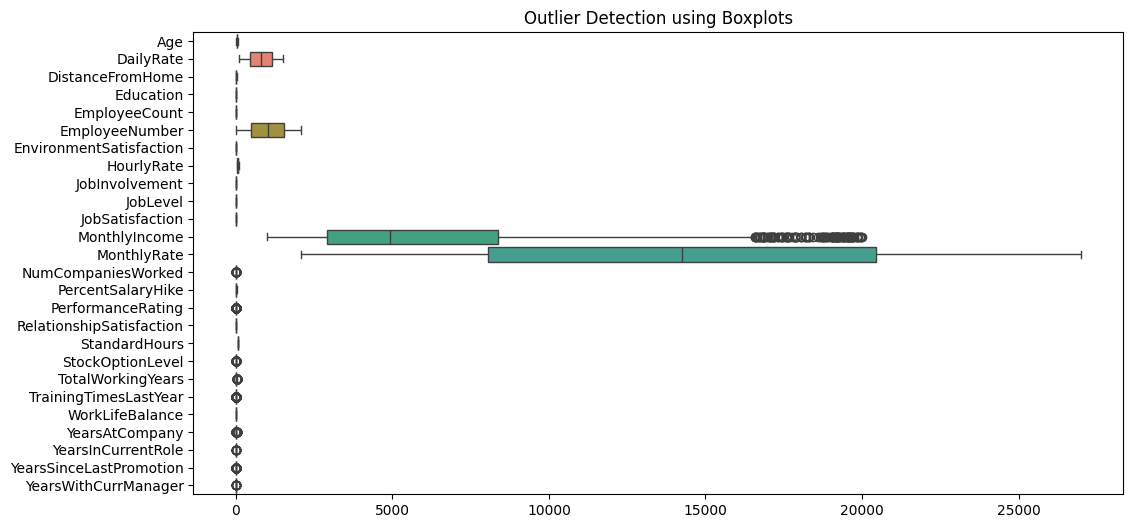

In [9]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for all numerical columns
sns.boxplot(data=df, orient="h")

# Show the plot
plt.title("Outlier Detection using Boxplots")
plt.show()

Some of the results are hard to see due to the scale, therefore I visualised a select number of columns below.

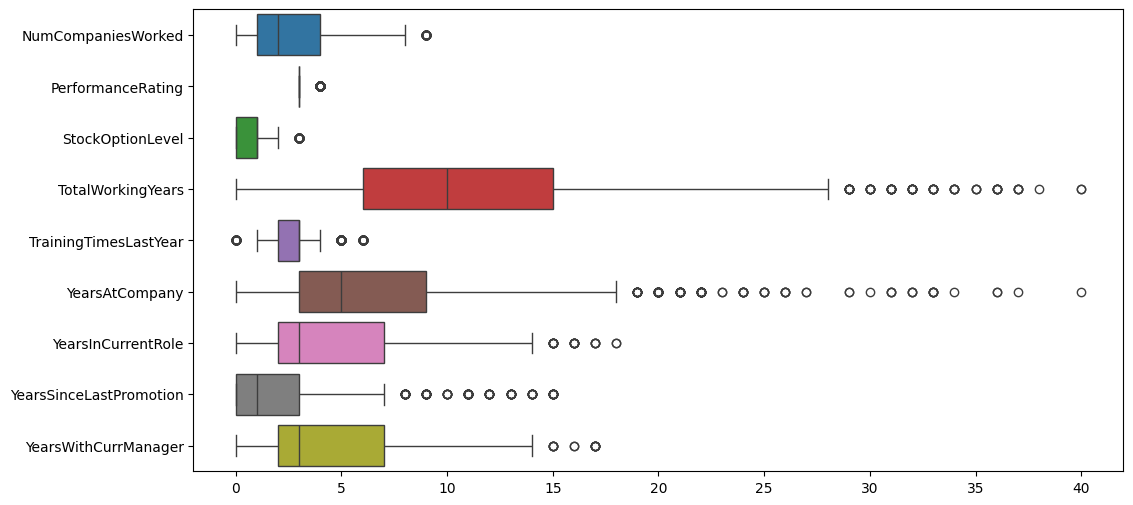

In [10]:
columns_to_check = ['NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']  # Replace with actual column names

# Plot only selected columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_check], orient="h")
plt.show()

Comparing the box plots for each feature by Attrition:

In [ ]:
# Define the columns to compare with Attrition
columns_to_check = ['NumCompaniesWorked','StockOptionLevel','MonthlyIncome','MonthlyRate','DailyRate',
                    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Loop through each column and create a boxplot
for col in columns_to_check:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['Attrition'], y=df[col], data=df)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col} Across Attrition")
    plt.show()

Currently it appears that people who leave will leave do so around the 2.5 year mark and are earlier on in their careers.

We can visualise the categorical columns grouped by the Attrition column by bar chart and percentage table. Taking into account the fact that the data has outliers and certain group are less represented than others we see that 
1. 25% of people who left travelled frequently 
2. 20% of people in the Sales department left
3. Technical and marketing people are most likely to leave at 22-24% (26% of HR also left however only 27 people from HR were counted in this study)

Code to Iteratively output the categorical feautures against Attrition:
categorical_columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

for col in categorical_columns:
    plt.figure(figsize=(8, 5))  # New figure for each plot

    # Group and count occurrences
    category_counts = df.groupby(['Attrition', col]).size().unstack()

    # **Sort columns by total count (sum over rows) in ascending order**
    category_counts = category_counts[category_counts.sum(axis=0).sort_values(ascending=False).index]

    # Plot stacked bar chart
    category_counts.plot(kind='bar', stacked=True, ax=plt.gca())

    # Labels & Title
    plt.xlabel('Attrition')
    plt.ylabel("Count")
    plt.title(f"Stacked Bar Chart: {col} vs {'Attrition'}")
    plt.legend(title=col)

    # Show plot
    plt.show()

In [45]:
categorical_columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

summary_tables = {}

# Loop through each categorical column
for cat_col in categorical_columns:
    # Cross-tabulation of Attrition and categorical variable
    crosstab = pd.crosstab(df[cat_col], df['Attrition'], margins=True)

    # Convert counts to percentages
    crosstab_percentage = crosstab.div(crosstab["All"], axis=0) * 100

    # Combine both count & percentage into a single DataFrame
    summary_table = crosstab.copy()
    for col in crosstab.columns[:-1]:  # Exclude the "All" column
        summary_table[col] = summary_table[col].astype(str) + " (" + crosstab_percentage[col].round(2).astype(str) + "%)"

    # Store the formatted summary table
    summary_tables[cat_col] = summary_table.drop(columns=["All"])  # Remove the total count column

    # Print the table
    print(f"\n📊 Summary Table for {cat_col} vs Attrition:\n")
    print(summary_tables[cat_col])



📊 Summary Table for BusinessTravel vs Attrition:

Attrition                      0             1
BusinessTravel                                
Non-Travel           138 (92.0%)     12 (8.0%)
Travel_Frequently   208 (75.09%)   69 (24.91%)
Travel_Rarely       887 (85.04%)  156 (14.96%)
All                1233 (83.88%)  237 (16.12%)

📊 Summary Table for Department vs Attrition:

Attrition                           0             1
Department                                         
Human Resources           51 (80.95%)   12 (19.05%)
Research & Development   828 (86.16%)  133 (13.84%)
Sales                    354 (79.37%)   92 (20.63%)
All                     1233 (83.88%)  237 (16.12%)

📊 Summary Table for EducationField vs Attrition:

Attrition                     0             1
EducationField                               
Human Resources     20 (74.07%)    7 (25.93%)
Life Sciences      517 (85.31%)   89 (14.69%)
Marketing          124 (77.99%)   35 (22.01%)
Medical            401 (86.

In [5]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

We know our data has outliers so let's address the outliers before looking at correlation and other patterns. We will use Box-Cox tranformation because we do not know the context of the outliers so we do not want to delete any data.
Box-Cox transformation is one approach to handle outliers and improve the normality of a dataset in preparation for predictive modeling. Box-cox is great because it adapts to different distributions.

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df_transformed = df

# Identify constant columns (avoid transformation on these)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Function to apply Box-Cox transformation
def apply_boxcoxs(series):
    if (series <= 0).any():  # Shift data if necessary
        series += abs(series.min()) + 1  # Shift to positive
    return boxcox(series)[0]  # Apply transformation

# Apply Box-Cox to numerical columns, skipping constant columns
for col in num_cols:
    try:
        df_transformed[col] = apply_boxcoxs(df[col])
    except ValueError as e:
        print(f"Skipping {col}: {e}")

# Keep categorical columns unchanged
df_transformed[cat_cols] = df[cat_cols]
df_transformed['Attrition'] = df_transformed['Attrition'].map({'Yes': 1, 'No': 0})

Skipping EmployeeCount: Data must not be constant.
Skipping StandardHours: Data must not be constant.


Looking at unskewed data

Data for looking at the unskewed data in box plots:
from scipy.stats import boxcox

# Function to apply Box-Cox transformation
def apply_boxcox(series):
    if (series <= 0).any():  # Shift data if necessary
        series += abs(series.min()) + 1
    transformed, _ = boxcox(series)
    return transformed

# Apply Box-Cox to numerical columns
df_transformed = df.copy()
for col in num_cols:
    df_transformed[col] = apply_boxcox(df[col])

# Visualize after transformation
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_transformed[col])
    plt.title(f"Boxplot of {col} (After Box-Cox)")
    plt.show()

Correlation of Unskewed data
Here you can see the top 20 features which are most correlated with Attrition including people who work overtime, have never been married or are Sales Representatives being most likely to leave


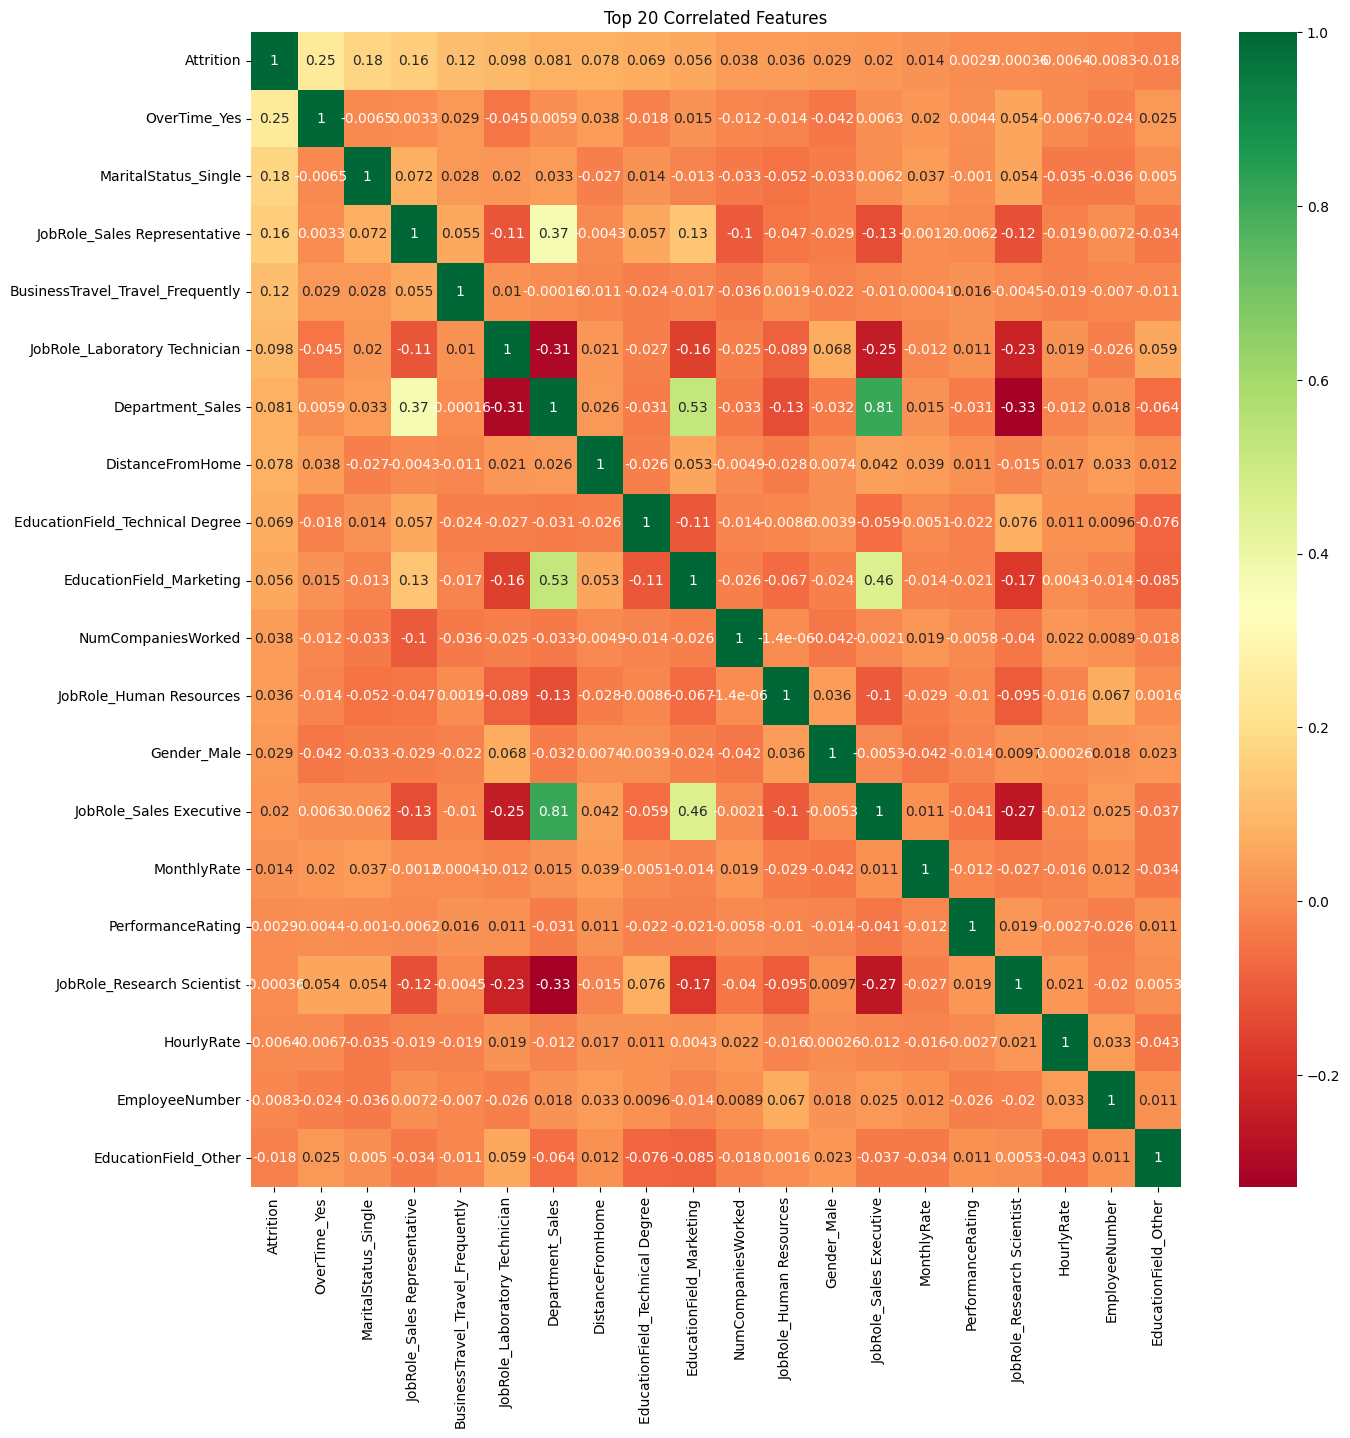

In [24]:

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df_transformed, drop_first=True)  # Creates numeric columns for categories

# Compute correlation with Attrition
corr_matrix = df_encoded.corr()

# Select top 20 features most correlated with Attrition
top_corr_features = corr_matrix.nlargest(20, "Attrition")["Attrition"].index

# Plot heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df_encoded[top_corr_features].corr(), annot=True, cmap="RdYlGn", annot_kws={"size": 10})

plt.title("Top 20 Correlated Features")
plt.show()

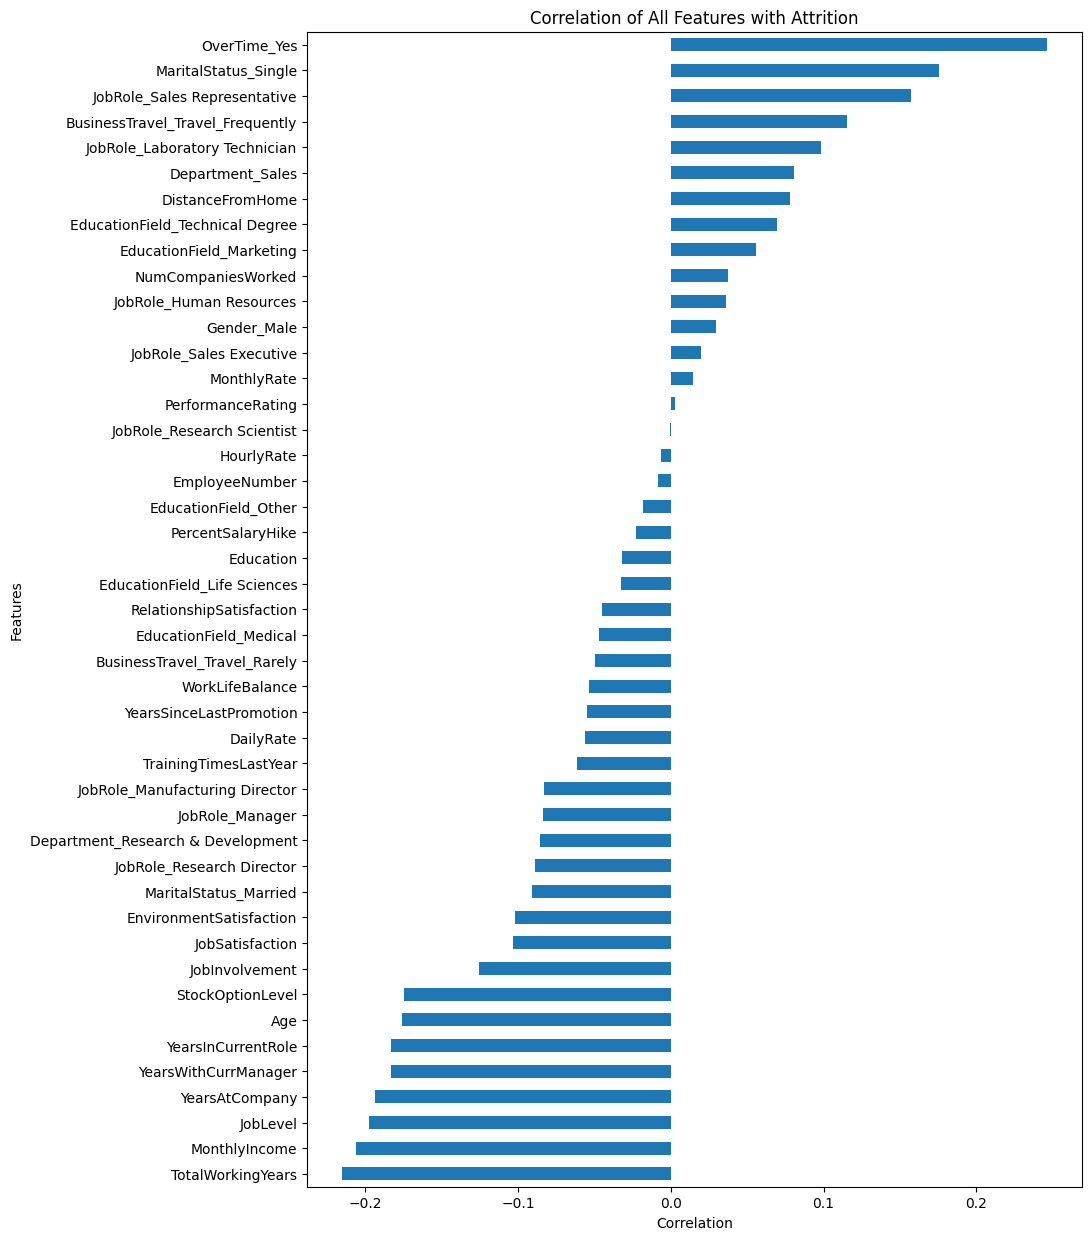

In [26]:
# Convert categorical columns to numeric using one-hot encoding
data_encoded = pd.get_dummies(df_transformed, drop_first=True)  # Avoid dummy variable trap

# Compute correlation with Attrition
corr_values = data_encoded.drop(columns=['Attrition','StandardHours','EmployeeCount'], errors='ignore').corrwith(data_encoded['Attrition']).sort_values()

# Plot correlation values
plt.figure(figsize=(10, 15))
corr_values.plot(kind='barh')
plt.title("Correlation of All Features with Attrition")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

In [ ]:
# Function to apply Box-Cox transformation
def apply_boxcoxs(series):
    if (series <= 0).any():  # Shift data if necessary
        series += abs(series.min()) + 1  # Shift to positive
    return boxcox(series)[0]  # Apply transformation

# Apply Box-Cox to numerical columns, skipping constant columns
for col in num_cols:
    try:
        df_transformed[col] = apply_boxcoxs(df[col])
    except ValueError as e:
        print(f"Skipping {col}: {e}")

# Keep categorical columns unchanged
df_transformed[cat_cols] = df[cat_cols]
df_transformed['Attrition'] = df_transformed['Attrition'].map({'Yes': 1, 'No': 0})

Skipping EmployeeCount: Data must not be constant.
Skipping StandardHours: Data must not be constant.


In [34]:
target_col = 'Attrition'

# Check attrition distribution (already binary 0=stayed, 1=left)
attrition_counts = df[target_col].value_counts()
print("Attrition distribution:")
print(attrition_counts)

# Calculate attrition rate
left_count = attrition_counts.get(1, 0)
total_count = len(df)
attrition_rate = left_count / total_count
print(f"Attrition rate: {attrition_rate:.2%}")

# Check for class imbalance
stayed_count = attrition_counts.get(0, 0)
if left_count > 0:
    imbalance_ratio = stayed_count / left_count
    print(f"Class imbalance ratio (stayed:left): {imbalance_ratio:.2f}:1")
    if imbalance_ratio > 3:
        print("Note: Dataset has significant class imbalance.")
else:
    print("Warning: No attrition cases found in the dataset.")
    imbalance_ratio = 999  # Set a high value to trigger class weight adjustment

Attrition distribution:
Attrition
0    1233
1     237
Name: count, dtype: int64
Attrition rate: 16.12%
Class imbalance ratio (stayed:left): 5.20:1
Note: Dataset has significant class imbalance.


Consider using class weights or resampling techniques

In [40]:
target_col = 'Attrition'
# Split Data
X = df_transformed.drop(target_col, axis=1)
y = df_transformed[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print Dataset Summary
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")
print(f"Training attrition rate: {np.mean(y_train):.2%}, Test attrition rate: {np.mean(y_test):.2%}")

# Preprocessing Pipeline (No Imputation Since No Nulls)
numeric_transformer = Pipeline([('scaler', StandardScaler())])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != target_col]
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
preprocessor = ColumnTransformer([
    
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Handle Class Imbalance
class_weight = {0: 1, 1: imbalance_ratio} if imbalance_ratio > 3 else None

# Define Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight=class_weight),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight=class_weight),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, scale_pos_weight=imbalance_ratio if imbalance_ratio > 3 else 1),
    'SVC': SVC(probability=True, random_state=42, class_weight=class_weight),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight=class_weight)
}

Training set shape: (1176, 34), Test set shape: (294, 34)
Training attrition rate: 16.16%, Test attrition rate: 15.99%


Attrition Rate
Since the attrition rates are very similar between training and test sets, it confirms that the split was done properly (stratified sampling). This prevents bias in the model.

Class Imbalance: Only about 16% of employees leave, meaning the dataset is imbalanced (more people stay than leave). Models must handle this imbalance to avoid favoring the majority class (employees who stay).

Real-World Representation: If the training and test data had very different attrition rates, the model might struggle to generalize. But here, the similarity means the model is trained on a representative sample of the real workforce.

In [41]:
# Train and Evaluate Models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")

    pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Compute Metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None,
        'Attrition Precision': precision_score(y_test, y_pred, pos_label=1),
        'Attrition Recall': recall_score(y_test, y_pred, pos_label=1),
        'Attrition F1': f1_score(y_test, y_pred, pos_label=1),
        'Model': pipeline
    }
    
    results[name] = metrics


Training Logistic Regression...

Training Random Forest...

Training Gradient Boosting...

Training XGBoost...

Training SVC...

Training KNN...

Training Decision Tree...


In [43]:
# Display Model Comparison
metrics_df = pd.DataFrame({k: {m: v[m] for m in v if m != "Model"} for k, v in results.items()}).T
print("\n=== Model Performance Comparison ===")
print(metrics_df)

# Identify Best Models
best_metric = 'Attrition Recall'
best_model_name = max(results, key=lambda k: results[k][best_metric] or 0)
best_model = results[best_model_name]['Model']
print(f"\nBest model based on {best_metric}: {best_model_name}")

# Feature Importance for Tree-Based Models
if hasattr(best_model.named_steps['model'], 'feature_importances_'):
    cat_features = preprocessor.transformers_[1][2]
    cat_feature_names = preprocessor.transformers_[1][1].steps[0][1].get_feature_names_out(cat_features)
    feature_names = np.concatenate([numeric_cols, cat_feature_names])
    
    importances = best_model.named_steps['model'].feature_importances_
    sorted_idx = np.argsort(importances)[::-1]


# Precision-Recall Curve and Optimal Threshold
if hasattr(best_model.named_steps['model'], 'predict_proba'):
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    optimal_threshold = thresholds[np.argmax(f1_scores)] if len(thresholds) > 0 else 0.5

    print(f"\nOptimal probability threshold for attrition: {optimal_threshold:.4f}")



=== Model Performance Comparison ===
                     Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
Logistic Regression  0.758503   0.825341  0.758503  0.782057  0.785770   
Random Forest        0.843537   0.805613  0.843537  0.791448  0.775562   
Gradient Boosting    0.857143   0.835296  0.857143  0.824622  0.796968   
XGBoost              0.863946   0.845157  0.863946  0.841337  0.766560   
SVC                  0.840136   0.841519  0.840136  0.840815  0.778103   
KNN                  0.857143   0.846561  0.857143  0.813776  0.647472   
Decision Tree        0.802721   0.795858  0.802721  0.799129  0.615557   

                     Attrition Precision  Attrition Recall  Attrition F1  
Logistic Regression             0.353659          0.617021      0.449612  
Random Forest                   0.571429          0.085106      0.148148  
Gradient Boosting               0.666667          0.212766      0.322581  
XGBoost                         0.666667          0.297872      0.411

Conclusion

The model that best identifies employees likely to leave (highest Attrition Recall) is Logistic Regression because it correctly flags the most potential leavers, making it the best choice if catching as many at-risk employees as possible is the goal.

If we look at overall performance (Accuracy, Precision, Recall, F1 Score, and ROC-AUC), XGBoost and Gradient Boosting perform best.

XGBoost has the highest F1 Score (0.841) and Accuracy (86.39%), meaning it's a strong all-around model.

Comparison:

Logistic Regression is best at finding leavers (high recall: 61.7%) but not as precise (some false positives).

Random Forest & KNN have poor recall, meaning they miss a lot of people who actually leave.

XGBoost & Gradient Boosting offer a balance, but they still miss many at-risk employees.

Optimal Probability Threshold (0.6073):

Instead of using the default 50% probability threshold, setting it to 0.6073 improves the model’s ability to detect leavers without too many false alarms.

Business Takeaway
If identifying at-risk employees is the priority (minimizing missed leavers), go with Logistic Regression.

If a balance between predicting leavers and overall accuracy is needed, XGBoost or Gradient Boosting is better.

Adjusting the probability threshold to 0.6073 makes the model more effective at detecting employees likely to leave.